# Universidad Politécnica Salesiana
## Realizado por: Juan Francisco Quizhpi
## Tema: Detección de objetos con uso de modelo pre-entrenado YOLO11
---
### Preparación del Dataset

### Carga y descompresion del dataset a para entrenamiento

In [ ]:
!unzip "/content/datasets/DatasetEmergencia.zip" -d /content/datasets
#/content/datasets/DatasetEmergencia.zip

Archive:  /content/datasets/DatasetEmergencia.zip
   creating: /content/datasets/DatasetEmergenciaFinal/
  inflating: /content/datasets/DatasetEmergenciaFinal/AnalisisDeImagenes.ipynb  
   creating: /content/datasets/DatasetEmergenciaFinal/images/
   creating: /content/datasets/DatasetEmergenciaFinal/images/train/
  inflating: /content/datasets/DatasetEmergenciaFinal/images/train/001.jpg  
  inflating: /content/datasets/DatasetEmergenciaFinal/images/train/002.jpg  
  inflating: /content/datasets/DatasetEmergenciaFinal/images/train/003.jpg  
  inflating: /content/datasets/DatasetEmergenciaFinal/images/train/004.jpg  
  inflating: /content/datasets/DatasetEmergenciaFinal/images/train/005.jpg  
  inflating: /content/datasets/DatasetEmergenciaFinal/images/train/006.jpg  
  inflating: /content/datasets/DatasetEmergenciaFinal/images/train/007.jpg  
  inflating: /content/datasets/DatasetEmergenciaFinal/images/train/008.jpg  
  inflating: /content/datasets/DatasetEmergenciaFinal/images/train/0

### Ceeacion de archivo yaml

In [ ]:
import yaml
#/content/datasets/DatasetEmergenciaFinal

data = {
    'path': '../datasets/DatasetEmergenciaFinal',
    'train': 'images/train',
    'val': 'images/val',
    'names': {
        0: 'ambulance',
        1: 'firetruck',
        2: 'policecar'
    }
}

with open('/content/datasets/DatasetEmergenciaFinal/data.yaml', 'w') as file:
    yaml.dump(data, file,
              default_flow_style=False,
              sort_keys=False)


### Afinación del modelo de YOLO 11 para tetección de vehiculos de emergencia

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 31.4 MB/s eta 0:00:00


1. Importar el modelo pre-entrenado
2. Usar el método "train" para realizar la afinación

In [ ]:
from ultralytics import YOLO
#/content/datasets/DatasetEmergenciaFinal
# 1. Cargar el modelo (nano, el más pequeño)
model = YOLO("yolo11n.pt")

# Afinar el modelo
results = model.train(data="/content/datasets/DatasetEmergenciaFinal/data.yaml",
                      epochs=20, # Número de iteraciones
                      imgsz=640, # Tamaño de las imágenes (máxima dimensión)
                      plots=True, # Guardar gráficos de entrenamiento
                      )

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 94.6MB/s]


Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/datasets/DatasetEmergenciaFinal/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 21.6MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/DatasetEmergenciaFinal/labels/train... 1053 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1053/1053 [00:00<00:00, 1335.49it/s]

train: New cache created: /content/datasets/DatasetEmergenciaFinal/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/DatasetEmergenciaFinal/labels/val... 710 images, 0 backgrounds, 0 corrupt: 100%|██████████| 710/710 [00:01<00:00, 687.37it/s]


val: New cache created: /content/datasets/DatasetEmergenciaFinal/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.47G     0.9053      2.448      1.334         45        640: 100%|██████████| 66/66 [00:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.70it/s]

                   all        710        877      0.791      0.404      0.655      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.38G     0.9677      1.598       1.37         58        640: 100%|██████████| 66/66 [00:22<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.38it/s]


                   all        710        877      0.402      0.491       0.42      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.38G     0.9854      1.466       1.37         54        640: 100%|██████████| 66/66 [00:24<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.23it/s]


                   all        710        877      0.708      0.699      0.729      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.38G     0.9626      1.355      1.354         44        640: 100%|██████████| 66/66 [00:21<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]


                   all        710        877      0.667      0.639      0.723      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.38G     0.9603       1.27      1.341         40        640: 100%|██████████| 66/66 [00:21<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.08it/s]


                   all        710        877      0.733      0.699      0.751      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.41G     0.9459      1.177      1.335         50        640: 100%|██████████| 66/66 [00:23<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.46it/s]


                   all        710        877      0.825      0.753      0.825      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.39G     0.9234      1.106      1.325         42        640: 100%|██████████| 66/66 [00:21<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.32it/s]


                   all        710        877      0.813       0.73      0.811      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       2.4G     0.8624      1.042      1.277         37        640: 100%|██████████| 66/66 [00:21<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.56it/s]


                   all        710        877      0.829      0.735      0.828       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.42G     0.8626     0.9914      1.257         37        640: 100%|██████████| 66/66 [00:22<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.53it/s]

                   all        710        877       0.78      0.743      0.815      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.37G     0.8405     0.9283      1.257         42        640: 100%|██████████| 66/66 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.22it/s]


                   all        710        877      0.785      0.731      0.805      0.597
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.37G     0.7531      1.056       1.27         24        640: 100%|██████████| 66/66 [00:23<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  2.91it/s]


                   all        710        877      0.852      0.798      0.877      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.41G     0.7245     0.8738      1.249         13        640: 100%|██████████| 66/66 [00:21<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.45it/s]


                   all        710        877      0.865      0.812      0.898      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.38G     0.6997     0.8097      1.227         13        640: 100%|██████████| 66/66 [00:23<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.06it/s]

                   all        710        877      0.867      0.804      0.894      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       2.4G     0.6767     0.7872      1.198         14        640: 100%|██████████| 66/66 [00:21<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]


                   all        710        877       0.84      0.778      0.879      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.37G     0.6498     0.6844      1.179         22        640: 100%|██████████| 66/66 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.60it/s]

                   all        710        877      0.782      0.767       0.88      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.37G     0.6232      0.658      1.157         20        640: 100%|██████████| 66/66 [00:22<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.21it/s]

                   all        710        877      0.865      0.802      0.898       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.37G     0.5997     0.6025      1.133         15        640: 100%|██████████| 66/66 [00:21<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.70it/s]


                   all        710        877      0.901      0.823      0.911      0.723

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.37G     0.5882     0.5704      1.112         16        640: 100%|██████████| 66/66 [00:22<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.49it/s]

                   all        710        877      0.908      0.866      0.932      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.37G     0.5632     0.5327        1.1         18        640: 100%|██████████| 66/66 [00:20<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.05it/s]

                   all        710        877       0.91      0.864      0.939      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.37G     0.5346     0.5036       1.08         15        640: 100%|██████████| 66/66 [00:21<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.62it/s]

                   all        710        877      0.911      0.876      0.941      0.767



20 epochs completed in 0.166 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.75it/s]


                   all        710        877      0.909      0.864      0.939      0.769
             ambulance        239        284      0.944      0.898      0.955      0.812
             firetruck        236        305       0.84       0.82      0.893      0.679
             policecar        235        288      0.942      0.875      0.968      0.816
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


### Verificamos el desempeño del modelo con entrenamiento y validacióm

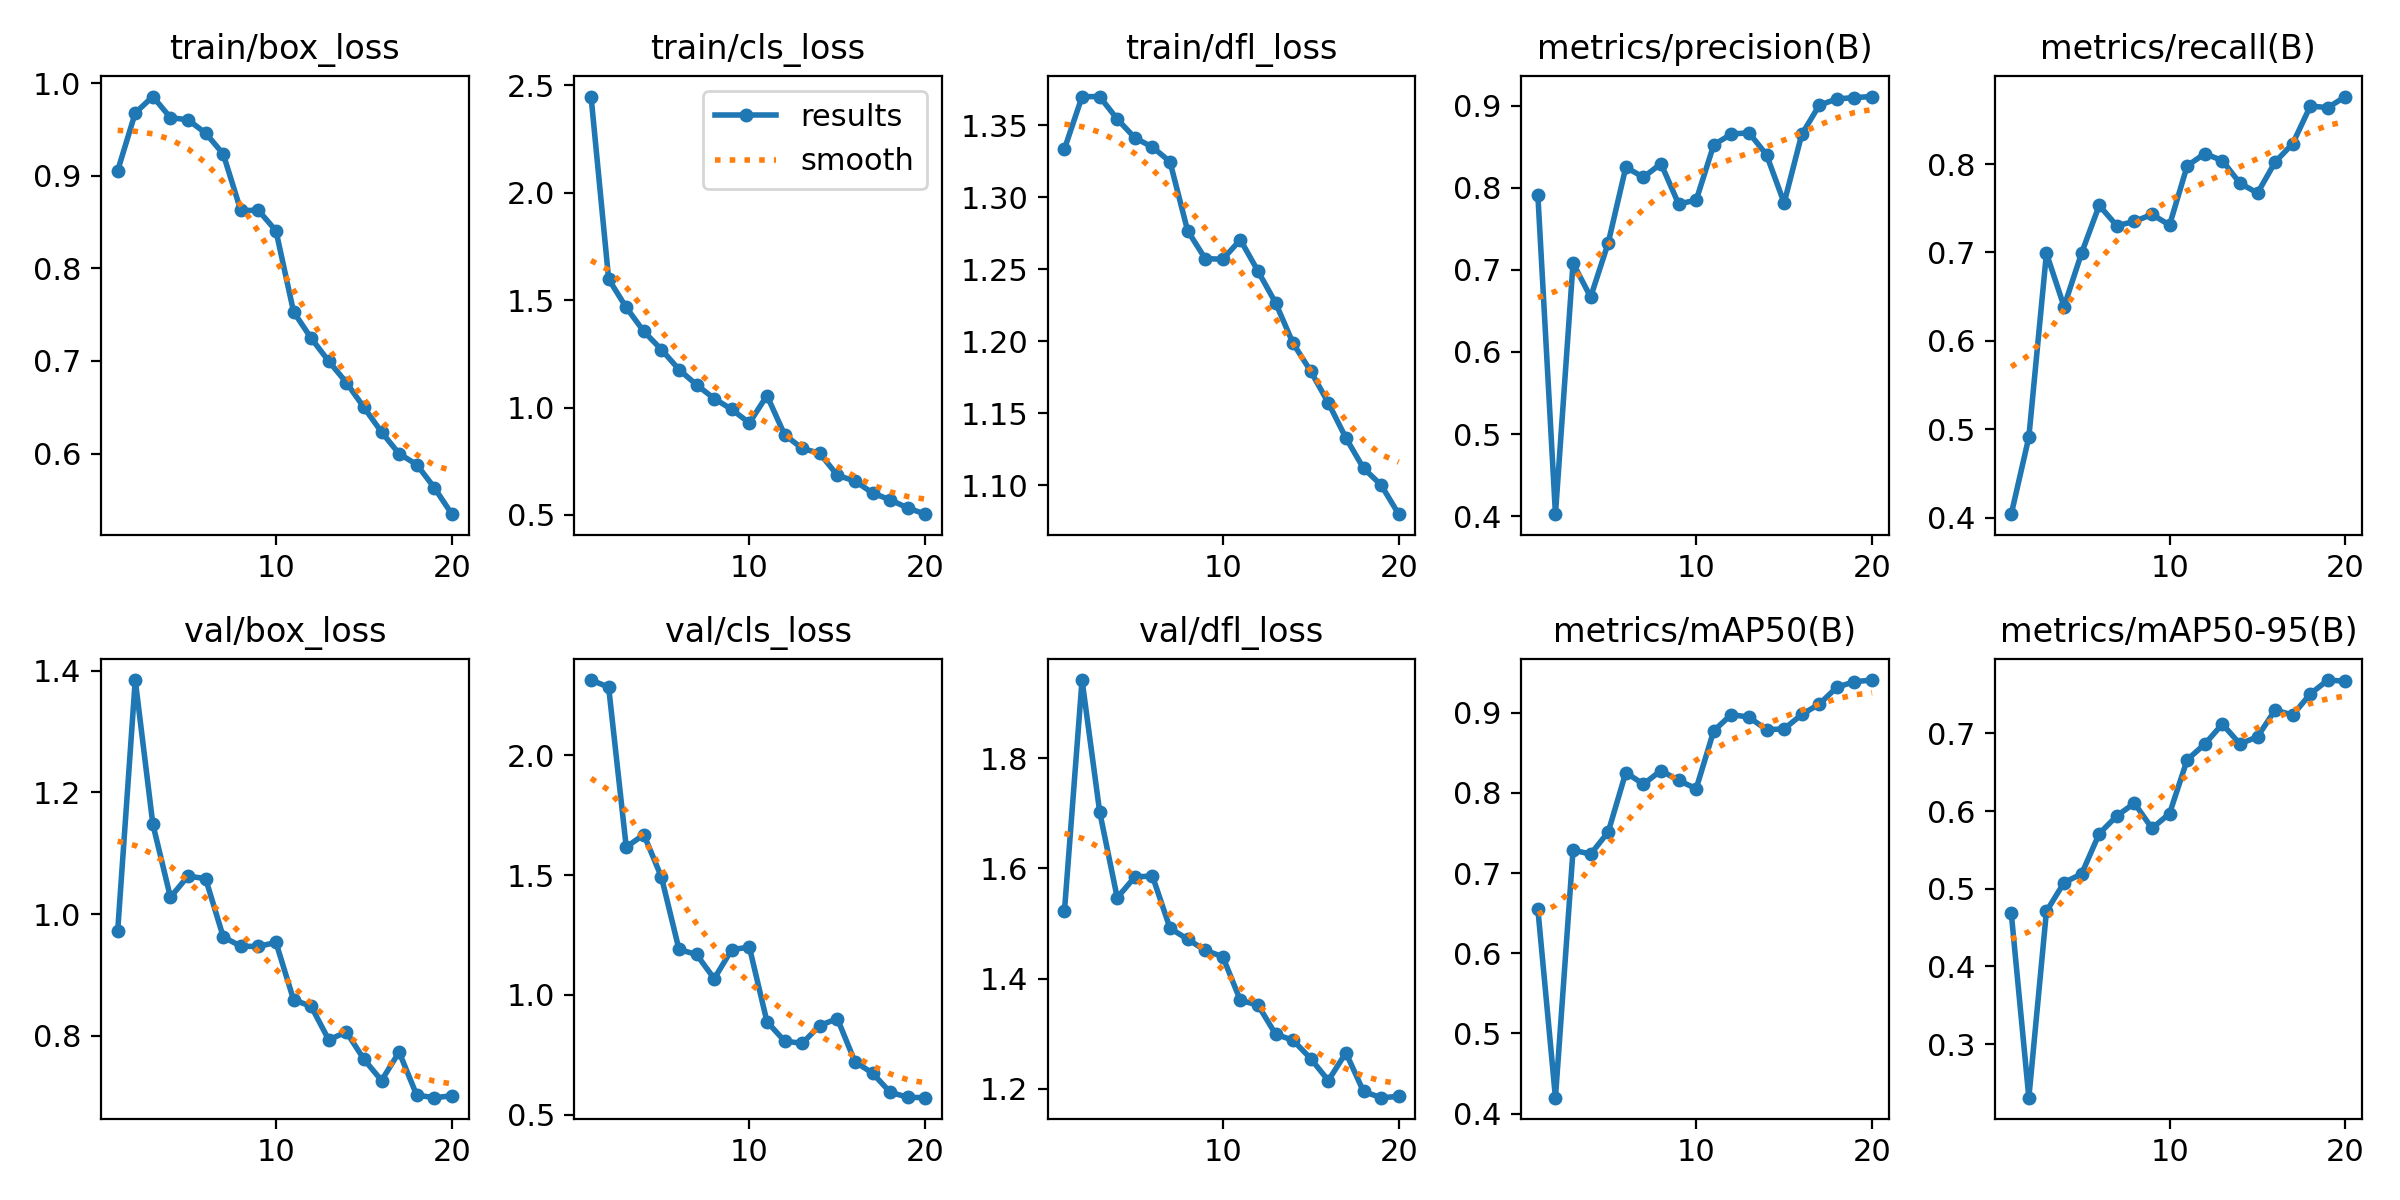

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename='/content/runs/detect/train/results.png', width=800)

### Matriz de confusión del modelo entrenado

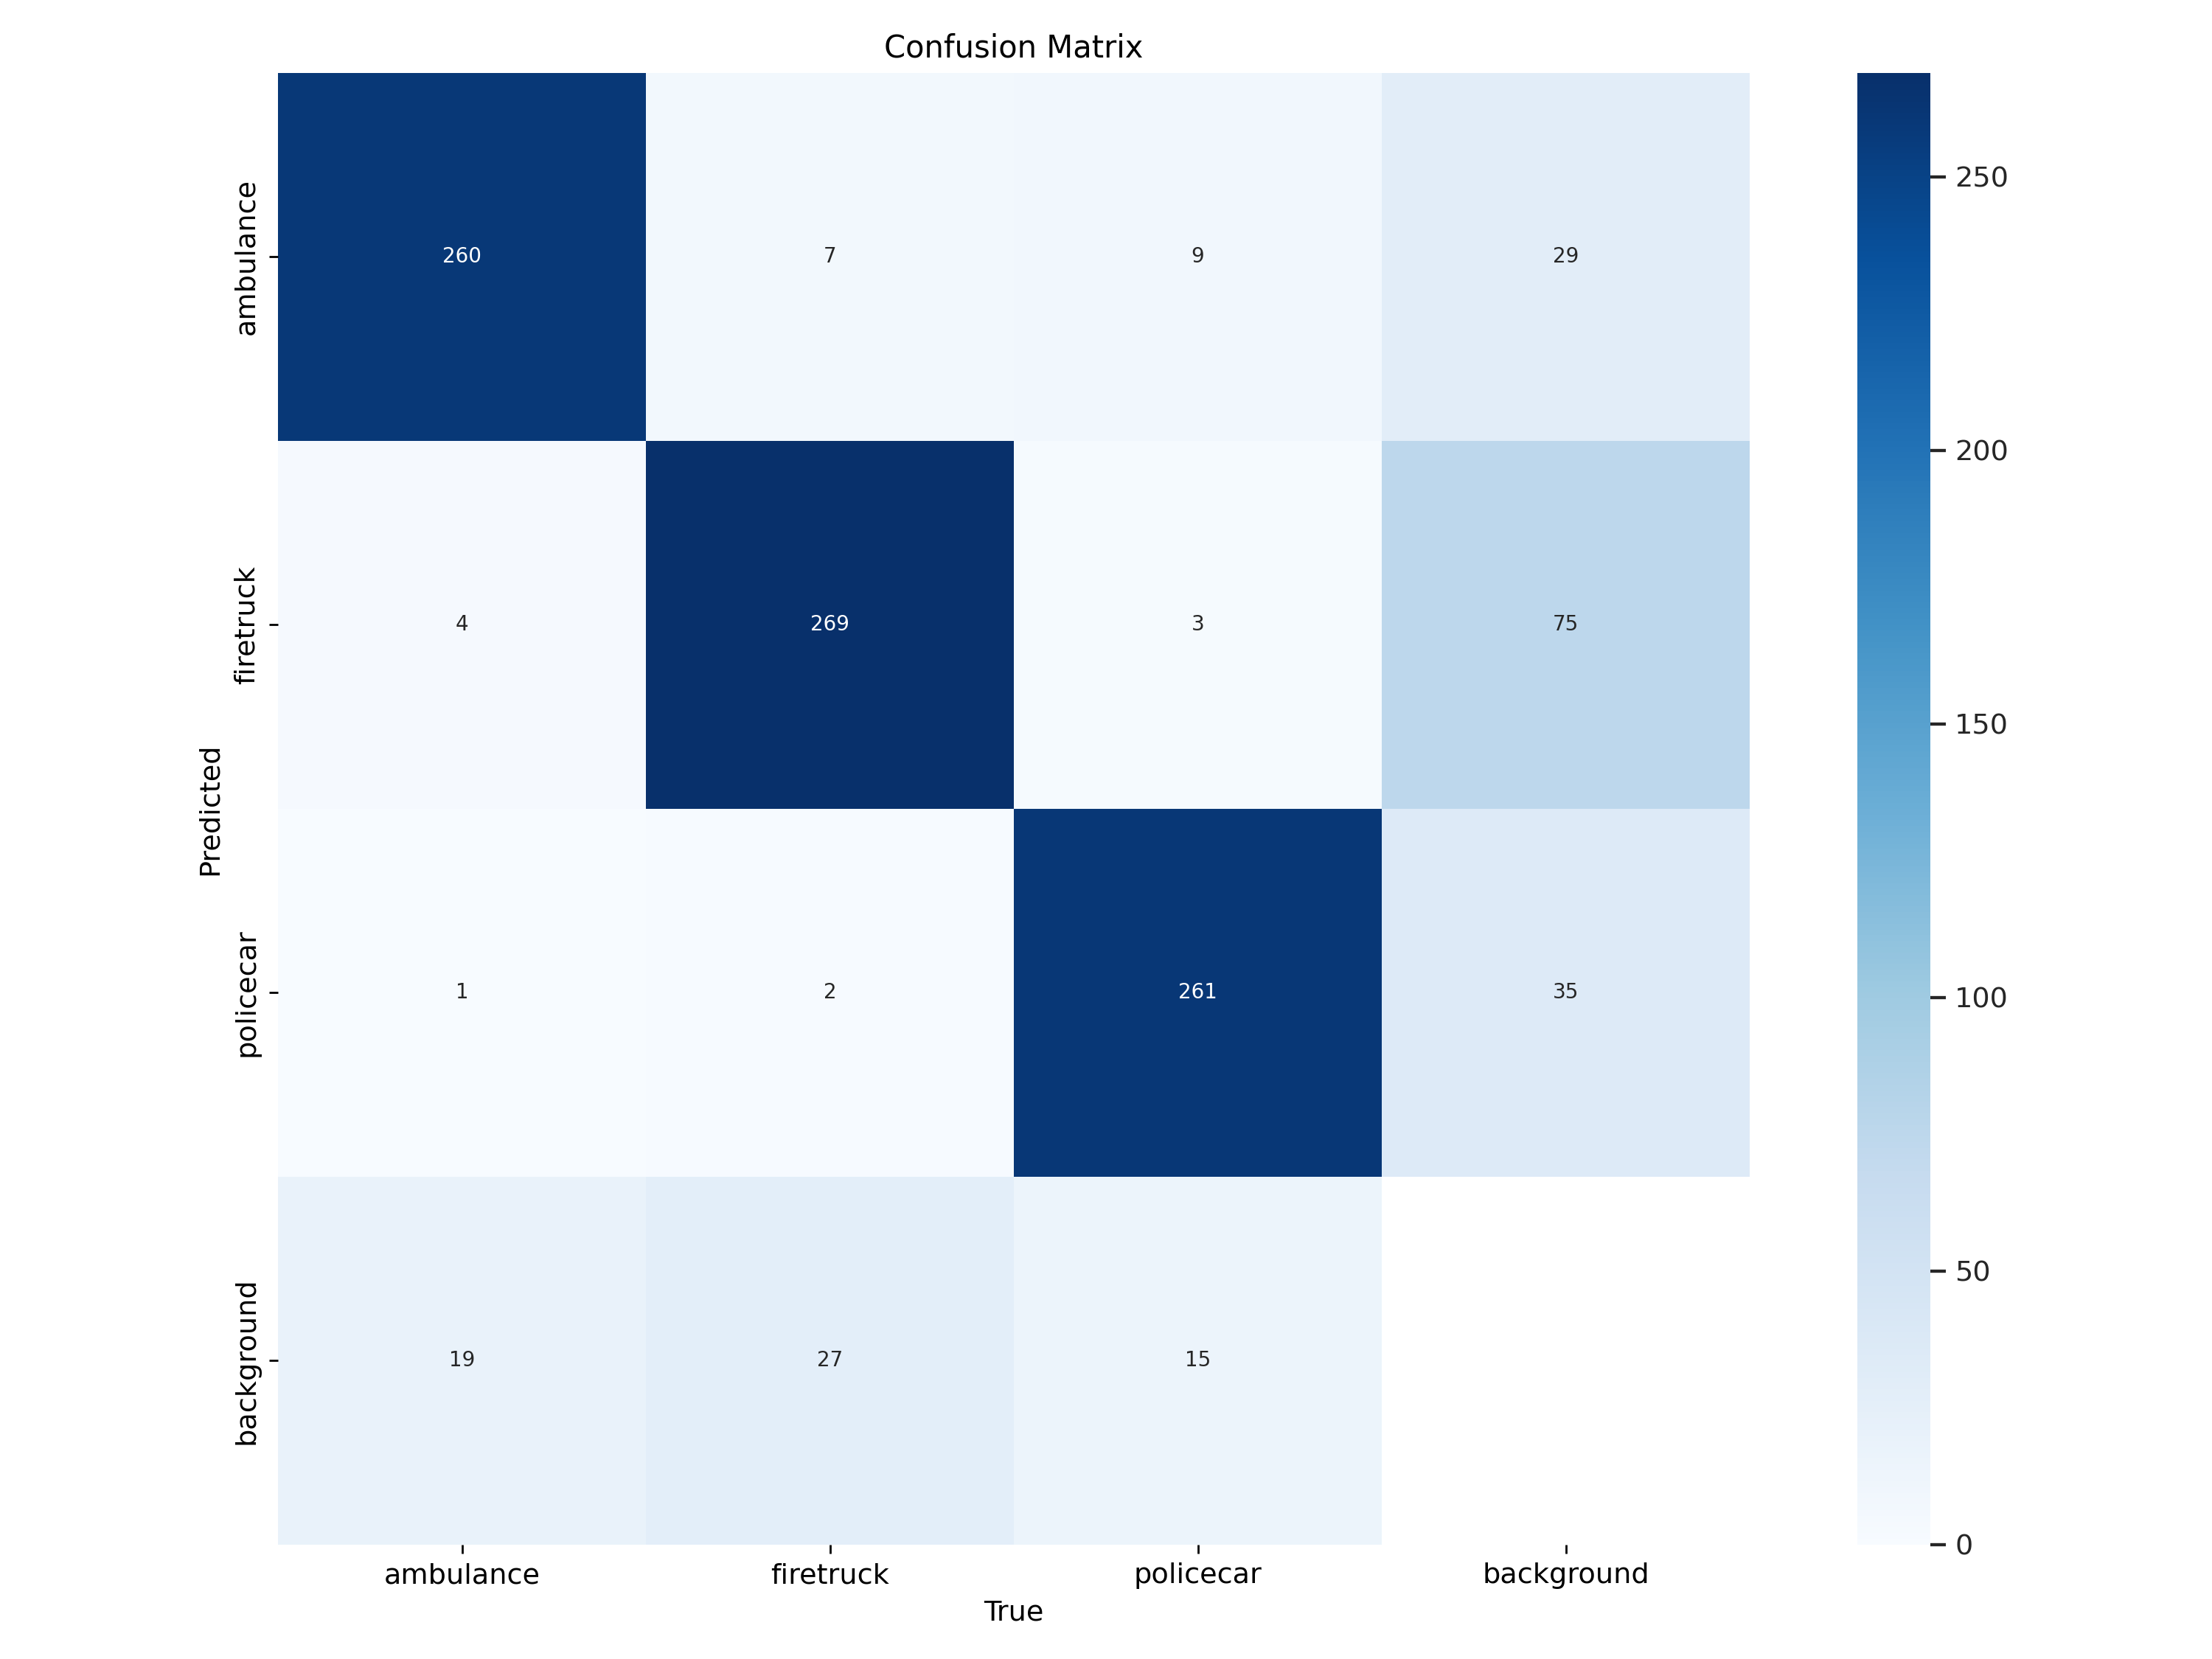

In [ ]:
IPyImage(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

### Generación de prediciones con el modelo afinado

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

### Cargamos imagenes validación

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
# Configurar entorno UTF-8
!export LC_ALL=C.UTF-8
!export LANG=C.UTF-8

!unzip "/content/imagenesTest/DatasetTest.zip" -d /content/imagenesTest
#/content/imagenesTest/DatasetTest.zip

Archive:  /content/imagenesTest/DatasetTest.zip
   creating: /content/imagenesTest/DatasetTest/
  inflating: /content/imagenesTest/DatasetTest/-charger-grand-theft-auto-v-mid-size-car-police-car-compact-car-building-car.png  
  inflating: /content/imagenesTest/DatasetTest/02c396fba0e1285e04e3d8421878b6ba9714baefv2_hq.jpg  
  inflating: /content/imagenesTest/DatasetTest/07feb78359983912e89c5859c555869d.jpg  
  inflating: /content/imagenesTest/DatasetTest/1.jpg  
  inflating: /content/imagenesTest/DatasetTest/103.jpg  
  inflating: /content/imagenesTest/DatasetTest/1032.jpg  
  inflating: /content/imagenesTest/DatasetTest/1143922-1.jpg  
  inflating: /content/imagenesTest/DatasetTest/12.jpg  
  inflating: /content/imagenesTest/DatasetTest/1436774238_gallery79.jpg  
  inflating: /content/imagenesTest/DatasetTest/1437469740_gallery1.jpg  
  inflating: /content/imagenesTest/DatasetTest/1491138524_1.jpg  
  inflating: /content/imagenesTest/DatasetTest/151441-gta-sa-2014-01-19-16-31-49-84.jpg

In [ ]:
preds = model('/content/imagenesTest/DatasetTest')
#/content/imagenesTest/DatasetTest
#/content/datasets/dataset_vehiculos/images/test


image 1/260 /content/imagenesTest/DatasetTest/-charger-grand-theft-auto-v-mid-size-car-police-car-compact-car-building-car.png: 384x640 1 policecar, 86.3ms
image 2/260 /content/imagenesTest/DatasetTest/02c396fba0e1285e04e3d8421878b6ba9714baefv2_hq.jpg: 480x640 1 ambulance, 48.9ms
image 3/260 /content/imagenesTest/DatasetTest/07feb78359983912e89c5859c555869d.jpg: 384x640 1 policecar, 10.0ms
image 4/260 /content/imagenesTest/DatasetTest/1.jpg: 384x640 1 firetruck, 9.4ms
image 5/260 /content/imagenesTest/DatasetTest/103.jpg: 384x640 1 ambulance, 9.0ms
image 6/260 /content/imagenesTest/DatasetTest/1032.jpg: 384x640 1 ambulance, 9.1ms
image 7/260 /content/imagenesTest/DatasetTest/1143922-1.jpg: 384x640 1 ambulance, 14.4ms
image 8/260 /content/imagenesTest/DatasetTest/12.jpg: 384x640 1 firetruck, 9.8ms
image 9/260 /content/imagenesTest/DatasetTest/1436774238_gallery79.jpg: 480x640 1 ambulance, 1 firetruck, 9.5ms
image 10/260 /content/imagenesTest/DatasetTest/1437469740_gallery1.jpg: 480x640

### Vemos las predicciones Realizadas

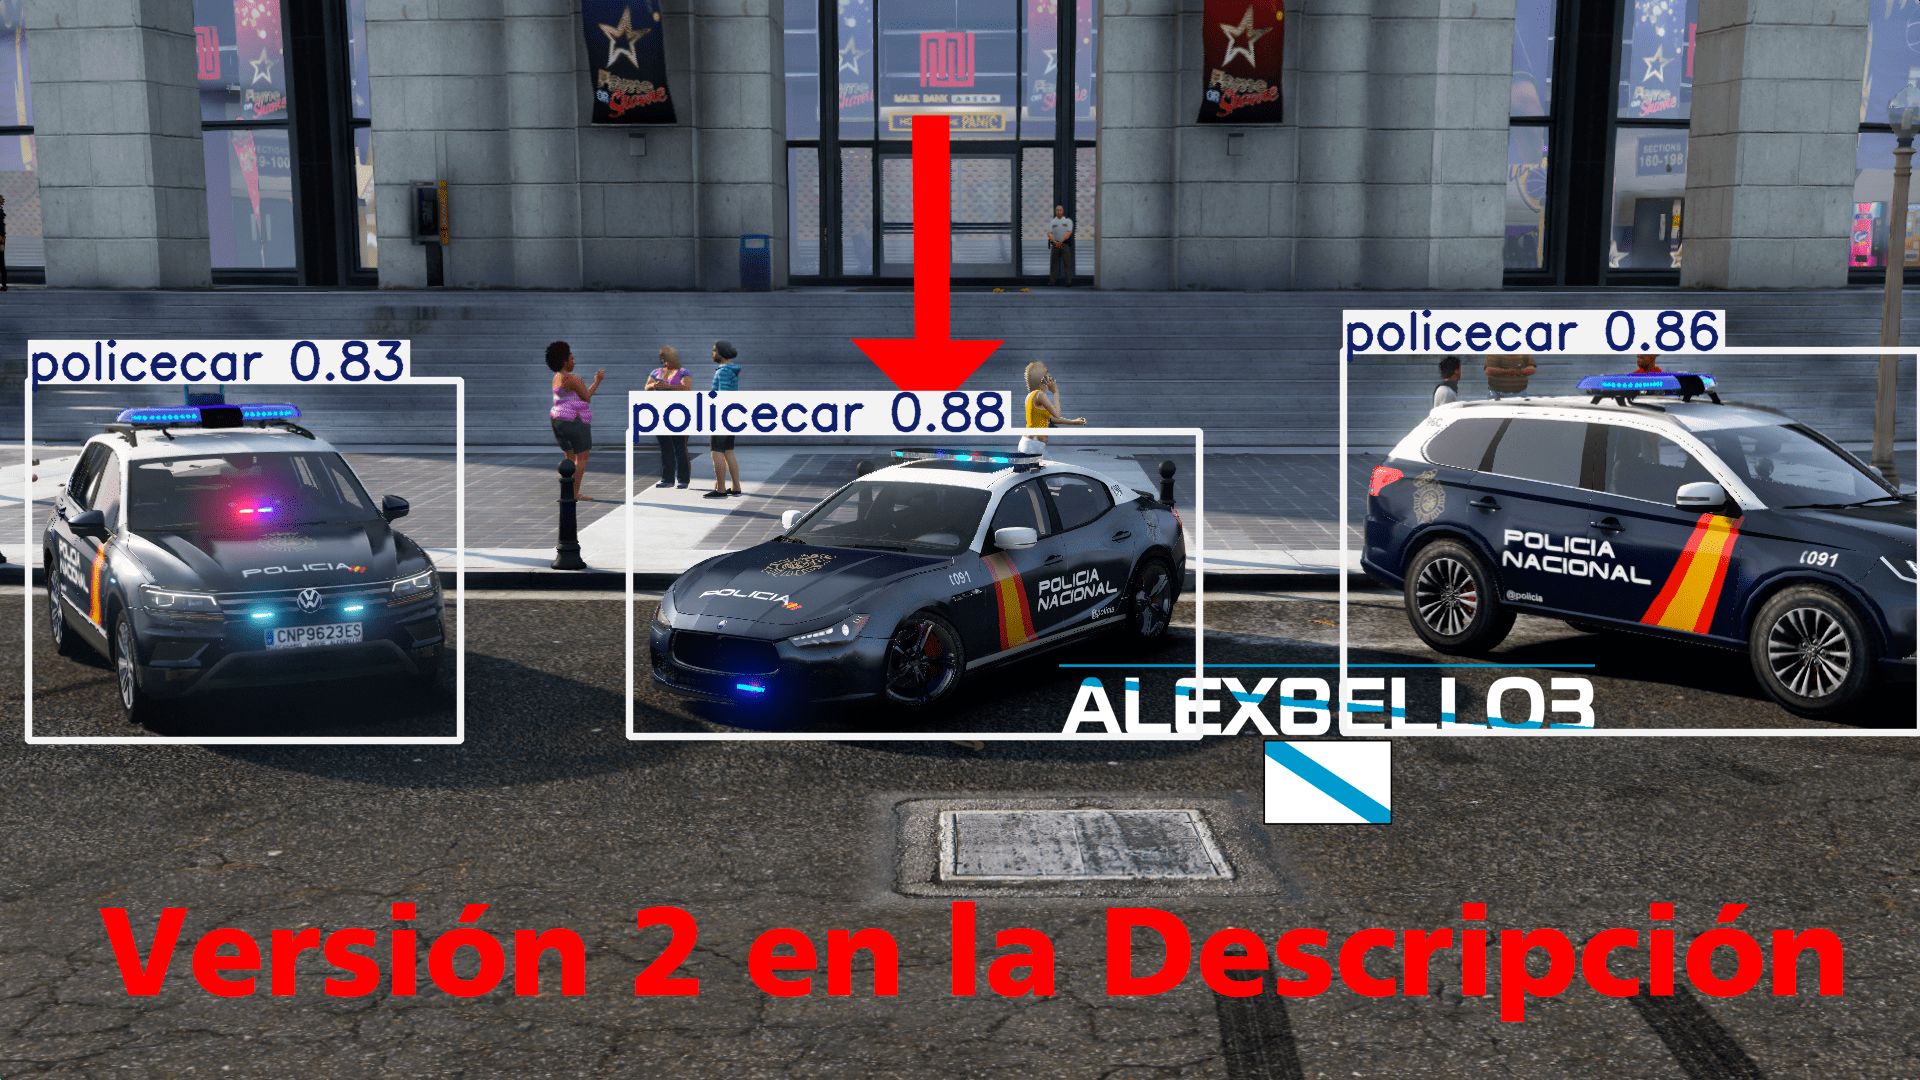

In [ ]:
# Mostrar predicciones
preds[126].show()

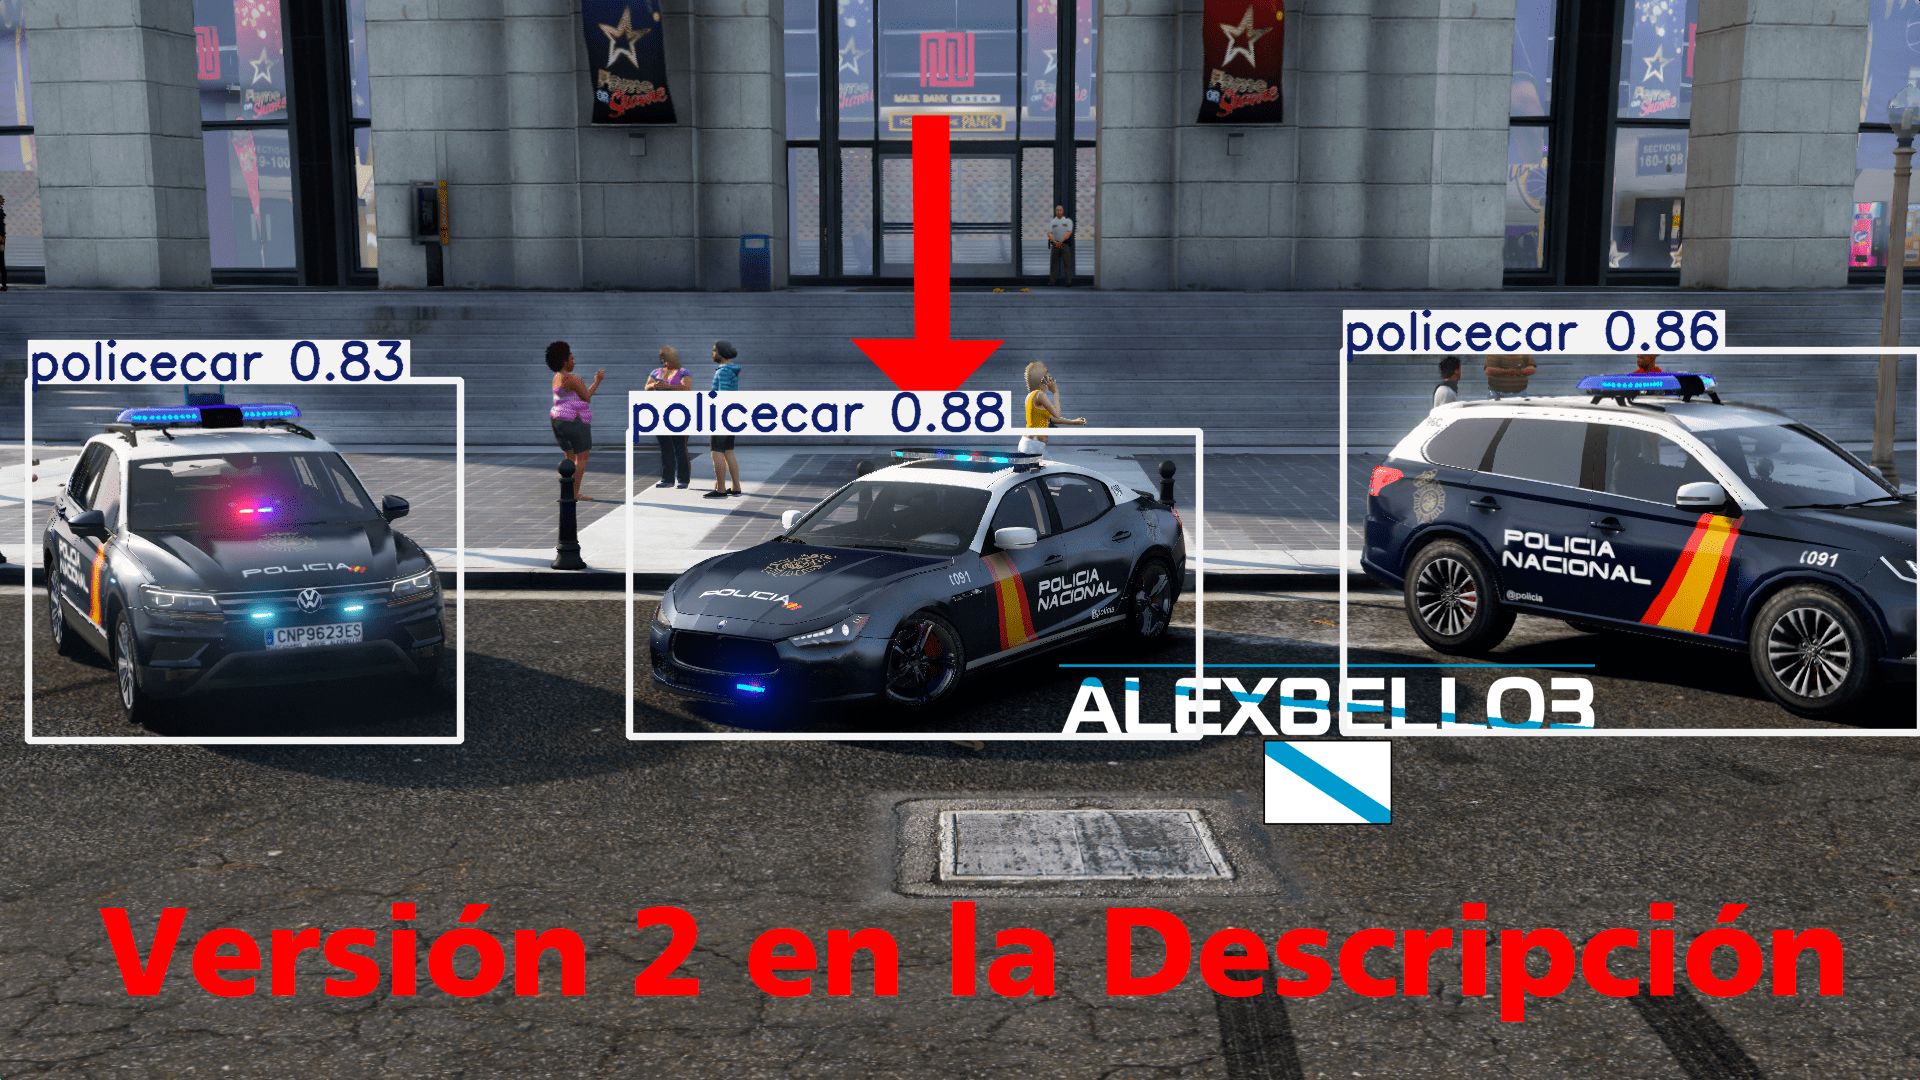

Predicción 1:
  Clase: tensor([0.], device='cuda:0')
  Confianza: tensor([0.8287], device='cuda:0')
  Coordenadas (x1, y1, x2, y2): tensor([[ 25.6772,   2.8866, 886.2866, 669.7236]], device='cuda:0')
Predicción 2:
  Clase: tensor([1.], device='cuda:0')
  Confianza: tensor([0.3409], device='cuda:0')
  Coordenadas (x1, y1, x2, y2): tensor([[  8.3250,   1.1469, 951.5731, 697.4509]], device='cuda:0')


In [ ]:
# Mostrar la imagen con predicciones
preds[126].show()

# Desplegar la información de las predicciones
for i, prediction in enumerate(preds[71].boxes):
    print(f"Predicción {i + 1}:")
    print(f"  Clase: {prediction.cls}")
    print(f"  Confianza: {prediction.conf}")
    print(f"  Coordenadas (x1, y1, x2, y2): {prediction.xyxy}")


### Conversión del modelo pt a onx

In [ ]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 95.9 MB/s eta 0:00:00


In [ ]:
!yolo export model=best.pt format=onnx

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 163.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 159.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 192.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.0s, installed 2 packages: ['onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.45...
ONNX: export success ✅ 7.8s, saved as '

In [ ]:
from google.colab import files

In [ ]:
files.download('best.onnx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Exportacion Alternativa
+ No funciona por float16

In [ ]:
model.export(format="onnx",opset = 12,simplify=True, half=True,device='gpu')

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:gpu (Tesla T4, 15102MiB)

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 12...
ONNX: slimming with onnxslim 0.1.45...
ONNX: export success ✅ 1.1s, saved as '/content/runs/detect/train/weights/best.onnx' (5.1 MB)

Export complete (1.2s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640 half 
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640 data=/content/datasets/DatasetEmergenciaFinal/data.yaml half 
Visualize:       https://netron.app


'/content/runs/detect/train/weights/best.onnx'